In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
candy = pd.read_csv('C:/Users/jycha/Downloads/candy-data.csv')

In [3]:
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [5]:
candy.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
candy['competitorname']=le.fit_transform(candy['competitorname'])
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,44,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,45,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,2,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [17]:
#Splitting the data into training and test test
X = candy.iloc[:,0:13].values
y = candy.iloc[:,11].values

In [18]:
X

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 7.3199999e-01,
        8.6000001e-01, 6.6971725e+01],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 6.0399997e-01,
        5.1099998e-01, 6.7602936e+01],
       [4.4000000e+01, 0.0000000e+00, 0.0000000e+00, ..., 1.1000000e-02,
        1.1600000e-01, 3.2261086e+01],
       ...,
       [8.2000000e+01, 0.0000000e+00, 1.0000000e+00, ..., 3.1299999e-01,
        3.1299999e-01, 4.4375519e+01],
       [8.3000000e+01, 0.0000000e+00, 0.0000000e+00, ..., 1.8600000e-01,
        2.6699999e-01, 4.1904308e+01],
       [8.4000000e+01, 1.0000000e+00, 0.0000000e+00, ..., 8.7199998e-01,
        8.4799999e-01, 4.9524113e+01]])

In [19]:
y

array([0.86000001, 0.51099998, 0.116     , 0.51099998, 0.51099998,
       0.76700002, 0.76700002, 0.51099998, 0.32499999, 0.32499999,
       0.51099998, 0.51099998, 0.32499999, 0.51099998, 0.034     ,
       0.034     , 0.32499999, 0.45300001, 0.465     , 0.465     ,
       0.465     , 0.465     , 0.093     , 0.91799998, 0.91799998,
       0.91799998, 0.51099998, 0.51099998, 0.51099998, 0.116     ,
       0.104     , 0.27900001, 0.65100002, 0.65100002, 0.32499999,
       0.51099998, 0.65100002, 0.44100001, 0.86000001, 0.86000001,
       0.91799998, 0.32499999, 0.76700002, 0.76700002, 0.97600001,
       0.32499999, 0.76700002, 0.65100002, 0.023     , 0.83700001,
       0.116     , 0.27900001, 0.65100002, 0.65100002, 0.65100002,
       0.96499997, 0.86000001, 0.069     , 0.27900001, 0.081     ,
       0.22      , 0.22      , 0.97600001, 0.116     , 0.65100002,
       0.65100002, 0.116     , 0.116     , 0.22      , 0.058     ,
       0.76700002, 0.32499999, 0.116     , 0.755     , 0.32499

In [20]:
X=candy.drop('pricepercent',axis=1)
X.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,winpercent
0,0,1,0,1,0,0,1,0,1,0,0.732,66.971725
1,1,1,0,0,0,1,0,0,1,0,0.604,67.602936
2,44,0,0,0,0,0,0,0,0,0,0.011,32.261086
3,45,0,0,0,0,0,0,0,0,0,0.011,46.116505
4,2,0,1,0,0,0,0,0,0,0,0.906,52.341465


In [21]:
y

array([0.86000001, 0.51099998, 0.116     , 0.51099998, 0.51099998,
       0.76700002, 0.76700002, 0.51099998, 0.32499999, 0.32499999,
       0.51099998, 0.51099998, 0.32499999, 0.51099998, 0.034     ,
       0.034     , 0.32499999, 0.45300001, 0.465     , 0.465     ,
       0.465     , 0.465     , 0.093     , 0.91799998, 0.91799998,
       0.91799998, 0.51099998, 0.51099998, 0.51099998, 0.116     ,
       0.104     , 0.27900001, 0.65100002, 0.65100002, 0.32499999,
       0.51099998, 0.65100002, 0.44100001, 0.86000001, 0.86000001,
       0.91799998, 0.32499999, 0.76700002, 0.76700002, 0.97600001,
       0.32499999, 0.76700002, 0.65100002, 0.023     , 0.83700001,
       0.116     , 0.27900001, 0.65100002, 0.65100002, 0.65100002,
       0.96499997, 0.86000001, 0.069     , 0.27900001, 0.081     ,
       0.22      , 0.22      , 0.97600001, 0.116     , 0.65100002,
       0.65100002, 0.116     , 0.116     , 0.22      , 0.058     ,
       0.76700002, 0.32499999, 0.116     , 0.755     , 0.32499

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (12,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [24]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 399ms/step - loss: 52.9062 - mse: 52.9062 - val_loss: 18.6913 - val_mse: 18.6913
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 14.1176 - mse: 14.1176 - val_loss: 7.0535 - val_mse: 7.0535
Epoch 3/100
2/2 [==============================] - 0s 60ms/step - loss: 5.1309 - mse: 5.1309 - val_loss: 3.0128 - val_mse: 3.0128
Epoch 4/100
2/2 [==============================] - 0s 67ms/step - loss: 1.8479 - mse: 1.8479 - val_loss: 1.1756 - val_mse: 1.1756
Epoch 5/100
2/2 [==============================] - 0s 52ms/step - loss: 0.6744 - mse: 0.6744 - val_loss: 0.5914 - val_mse: 0.5914
Epoch 6/100
2/2 [==============================] - 0s 39ms/step - loss: 0.3231 - mse: 0.3231 - val_loss: 0.3963 - val_mse: 0.3963
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2032 - mse: 0.2032 - val_loss: 0.2921 - val_mse: 0.2921
Epoch 8/100
2/2 [==============================] - 0s 54ms/step - loss: 0.1674 - ms

In [25]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 1.5717 - mse: 1.5717


[1.5717076063156128, 1.5717076063156128]

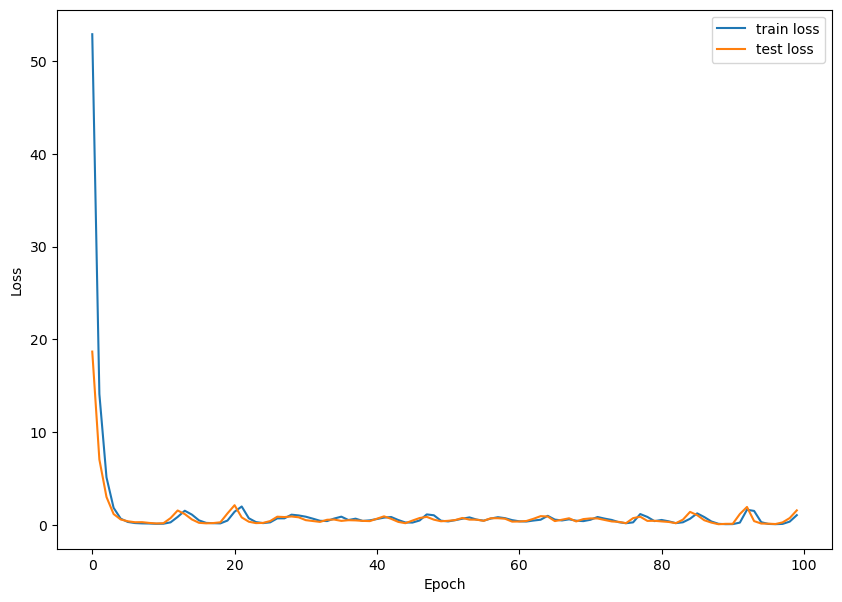

In [26]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

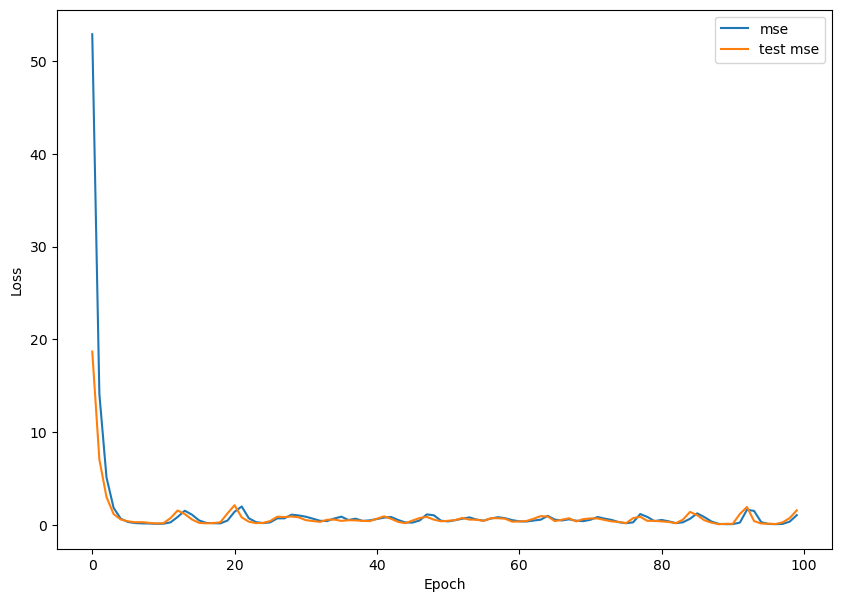

In [27]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()